In [49]:
from cProfile import label
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Read data
name = pd.read_excel("short_data.xlsx", sheet_name="Name", index_col=0)     # 8208 cells
public_date = pd.read_excel("short_data.xlsx", sheet_name="Public Date", index_col=0, parse_dates=True)     
ocf = pd.read_excel("short_data.xlsx", sheet_name="OCF", index_col=0)   # 1113 missing values   86%
roa = pd.read_excel("short_data.xlsx", sheet_name="ROA", index_col=0)   # 1424    83%
ta = pd.read_excel("short_data.xlsx", sheet_name="TA", index_col=0)   # 1115   86%
mv = pd.read_excel("short_data.xlsx", sheet_name="MV", index_col=0)   # 1795    78%
total_lia = pd.read_excel("short_data.xlsx", sheet_name="Total Lia", index_col=0)    # 1114    86%
sales = pd.read_excel("short_data.xlsx", sheet_name="Sales", index_col=0)   # 1104    87%
tangible_FA = pd.read_excel("short_data.xlsx", sheet_name="Tangible FA", index_col=0)   # 1124    86%
total_ca = pd.read_excel("short_data.xlsx", sheet_name="Total CA", index_col=0)   # 1114    86%
current_lia = pd.read_excel("short_data.xlsx", sheet_name="Total Current Lia", index_col=0)   # 1114    86%
fixed_assets = pd.read_excel("short_data.xlsx", sheet_name="Fixed assets", index_col=0)
accounts_receivable = pd.read_excel("short_data.xlsx", sheet_name="Accounts Receivable", index_col=0)
costs_of_revenue = pd.read_excel("short_data.xlsx", sheet_name="Costs of revenue", index_col=0)
ebit = pd.read_excel("short_data.xlsx", sheet_name="EBIT", index_col=0)
eps = pd.read_excel("short_data.xlsx", sheet_name="EPS", index_col=0)
equity = pd.read_excel("short_data.xlsx", sheet_name="Equity", index_col=0)
avg_receivable_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Receivable days", index_col=0)
avg_payable_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Payable days", index_col=0)
avg_inventory_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Inventory days", index_col=0)
# Biến vĩ mô
gdp = pd.read_excel("short_data.xlsx", sheet_name="GDP", index_col=0)
cpi = pd.read_excel("short_data.xlsx", sheet_name="CPI", index_col=0)
interest_rates = pd.read_excel("short_data.xlsx", sheet_name="Interest rates", index_col=0)

In [51]:
# Drop companies are established under 5 years
com_under5years = []
for i in name.index:
  if int(public_date.loc[i,'Date Became Public'].strftime('%Y')) > 2015:
    com_under5years.append(i)      
print(len(com_under5years))  # 168 companies are established under 5 years.

name.drop(com_under5years,axis='index', inplace=True)   # 516 remained companies
ocf.drop(com_under5years,axis='columns', inplace=True)
roa.drop(com_under5years,axis='columns', inplace=True)
ta.drop(com_under5years,axis='columns', inplace=True)
mv.drop(com_under5years,axis='columns', inplace=True)
total_lia.drop(com_under5years,axis='columns', inplace=True)
sales.drop(com_under5years,axis='columns', inplace=True)
tangible_FA.drop(com_under5years,axis='columns', inplace=True)
total_ca.drop(com_under5years,axis='columns', inplace=True)
current_lia.drop(com_under5years,axis='columns', inplace=True)
fixed_assets.drop(com_under5years,axis='columns', inplace=True)
accounts_receivable.drop(com_under5years,axis='columns', inplace=True)
costs_of_revenue.drop(com_under5years,axis='columns', inplace=True)
ebit.drop(com_under5years,axis='columns', inplace=True)
eps.drop(com_under5years,axis='columns', inplace=True)
equity.drop(com_under5years,axis='columns', inplace=True)
avg_receivable_days.drop(com_under5years,axis='columns', inplace=True)
avg_payable_days.drop(com_under5years,axis='columns', inplace=True)
avg_inventory_days.drop(com_under5years,axis='columns', inplace=True)
gdp.drop(com_under5years,axis='columns', inplace=True)
cpi.drop(com_under5years,axis='columns', inplace=True)
interest_rates.drop(com_under5years,axis='columns', inplace=True)
public_date = public_date.loc[name.index, :]

public_date.shape

industry = name['TRBC Economic Sector Name'].value_counts().index.tolist()

168


Healthcare

In [52]:
# Healthcare
for i in name.index:
  if "Healthcare" not in name["TRBC Economic Sector Name"][i]:
    name = name.drop(labels=i, axis=0)
    public_date = public_date.drop(labels=i, axis=0)

In [53]:
def drop_company(data, name):
  for i in data.columns:
    if i not in name.index:
      del data[i]
  return data

ocf = drop_company(ocf, name)
roa = drop_company(roa, name)
ta = drop_company(ta, name)
mv = drop_company(mv, name)
total_lia = drop_company(total_lia, name)
sales = drop_company(sales, name)
tangible_FA = drop_company(tangible_FA, name)
total_ca = drop_company(total_ca, name)
current_lia = drop_company(current_lia, name)
fixed_assets = drop_company(fixed_assets, name)
accounts_receivable = drop_company(accounts_receivable, name)
costs_of_revenue = drop_company(costs_of_revenue, name)
ebit = drop_company(ebit, name)
eps = drop_company(eps, name)
equity = drop_company(equity, name)
avg_receivable_days = drop_company(avg_receivable_days, name)
avg_payable_days = drop_company(avg_payable_days, name)
avg_inventory_days = drop_company(avg_inventory_days, name)
gdp = drop_company(gdp, name)
cpi = drop_company(cpi, name)
interest_rates = drop_company(interest_rates, name)


In [54]:
# Fill Avg. Inventory days

# Cách 1: For the time-series dataset variable, it makes sense to use the interpolation of the variable before and after a timestamp for a missing value.

avg_inventory_days = avg_inventory_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_inventory_days.isnull().sum().sum())   # 48 (VNF.HN, VNT.HN, VNL.HM, TVC.HN bị NaN nguyên cột)

# Fill Avg. Payable days

avg_payable_days = avg_payable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_payable_days.isnull().sum().sum())   # 0

# Fill Avg. Receivable days

avg_receivable_days = avg_receivable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_receivable_days.isnull().sum().sum())  # 0

# Fill Equity

equity = equity.interpolate(method='linear', limit_direction='both', axis=0)
print(equity.isnull().sum().sum()) 

# Fill Fixed Assets

fixed_assets = fixed_assets.interpolate(method='linear', limit_direction='both', axis=0)
print(fixed_assets.isnull().sum().sum()) 

# Fill EBIT

ebit = ebit.interpolate(method='linear', limit_direction='both', axis=0)
print(ebit.isnull().sum().sum()) 

# Fill cost of revenue

costs_of_revenue = costs_of_revenue.interpolate(method='linear', limit_direction='both', axis=0)
print(costs_of_revenue.isnull().sum().sum()) 

# Fill A.R

accounts_receivable = accounts_receivable.interpolate(method='linear', limit_direction='both', axis=0)
print(accounts_receivable.isnull().sum().sum()) 

0
0
0
0
0
0
0
0


In [55]:
def detect_nan(data):
  nan_values = data.isna()
  nan_columns = nan_values.any()
  columns_with_nan = data.columns[nan_columns].tolist()
  return (columns_with_nan)

detect_nan(avg_inventory_days)


def fix_negative(data):
  for j in range(data.shape[1]):
    for i in range(data.shape[0]):
      if data.iloc[i,j] < 0:
        data.iloc[i,j] = 0-data.iloc[i,j]

fix_negative(costs_of_revenue)
fix_negative(accounts_receivable)
fix_negative(avg_inventory_days)
fix_negative(avg_receivable_days)
fix_negative(avg_payable_days)

In [56]:
# Calculate NI
ni = roa * ta

# Calculate Size
size = np.log(mv)

# Calculate Leverage
lev = total_lia / ta

# Calculate PPE
ppe = tangible_FA / sales

# Calculate Liquidity
liq = total_ca / current_lia

# Calculate Growth                                            (based on 2010-2020)
growth = sales.pct_change(periods=1)
growth.drop(growth.index[0], axis='index', inplace=True)

# Calculate Inv turnover ratio
inv_turnover = 365 / avg_inventory_days

# Calculate Inv
inv = sales/inv_turnover

# Calculate Quick ratio
quick = (total_ca - inv) / current_lia

# Calculate FA turnover ratio 
fa_turnover = sales / fixed_assets

# Calculate TA turnover ratio 
ta_turnover = sales / ta

# Calculate DSO
dso = accounts_receivable / (sales / 365)

# Calculate Capital intensity
capital_intensity = ta / sales

# Calculate Expense revenue ratio
expense_revenue = costs_of_revenue / sales

# Calculate Operating margin
operating_margin = ebit / sales

# Calculate Net profit margin
net_profit_margin = ni / sales

# Calculate BEP
bep = ebit / ta

# Calculate ROE
roe = ni / equity

# Calculate growth of CCC
ccc = avg_inventory_days + avg_receivable_days - avg_payable_days

# Drop year 2009
ni.drop(ni.index[0], axis='index', inplace=True)   
ocf.drop(ocf.index[0], axis='index', inplace=True)   
size.drop(size.index[0], axis='index', inplace=True)   
lev.drop(lev.index[0], axis='index', inplace=True)   
ppe.drop(ppe.index[0], axis='index', inplace=True)   
liq.drop(liq.index[0], axis='index', inplace=True)  
inv_turnover.drop(inv_turnover.index[0], axis='index', inplace=True) 
quick.drop(quick.index[0], axis='index', inplace=True) 
fa_turnover.drop(fa_turnover.index[0], axis='index', inplace=True) 
ta_turnover.drop(ta_turnover.index[0], axis='index', inplace=True) 
dso.drop(dso.index[0], axis='index', inplace=True) 
capital_intensity.drop(capital_intensity.index[0], axis='index', inplace=True) 
expense_revenue.drop(expense_revenue.index[0], axis='index', inplace=True) 
operating_margin.drop(operating_margin.index[0], axis='index', inplace=True) 
net_profit_margin.drop(net_profit_margin.index[0], axis='index', inplace=True) 
bep.drop(bep.index[0], axis='index', inplace=True) 
roe.drop(roe.index[0], axis='index', inplace=True) 
roa.drop(roa.index[0], axis='index', inplace=True) 
eps.drop(eps.index[0], axis='index', inplace=True) 
ccc.drop(ccc.index[0], axis='index', inplace=True) 
gdp.drop(gdp.index[0], axis='index', inplace=True)  
cpi.drop(cpi.index[0], axis='index', inplace=True)  
interest_rates.drop(interest_rates.index[0], axis='index', inplace=True)  

# Calculate Age of companies
ind = list(range(2010, 2021))
col = size.columns
age = pd.DataFrame(columns=size.columns)

for i in ind:
  list_year = []
  for j in size.columns:
    num = i - public_date.loc[j,'Organization Founded Year']
    list_year.append(num)
  age_length = len(age)
  age.loc[age_length] = list_year
age.index = size.index

age = age.replace(list(range(-5,0)), np.NaN)

In [57]:
cols=[]
for j in range(len(total_ca.columns)):
  for i in range(len(total_ca.index)):
    if total_ca.iloc[i,j] < inv.iloc[i,j]:
      cols.append(total_ca.columns[j])
      break
print(len(cols))

cols=[]
for j in range(len(ebit.columns)):
  for i in range(len(ebit.index)):
    if sales.iloc[i,j] < ebit.iloc[i,j]:
      cols.append(ebit.columns[j])
      break
print(len(cols))

cols=[]
for j in range(len(ni.columns)):
  for i in range(len(ni.index)):
    if sales.iloc[i,j] < ni.iloc[i,j]:
      cols.append(ni.columns[j])
      break
print(len(cols))


6
1
1


In [58]:
# NI > 0 & OCF > 0 --> Nhóm profit (có lợi nhuận ròng và lợi nhuận từ hoạt động kd)
# NI<= 0 & OCF <= 0 --> Nhóm loss (không có lợi nhuận từ hđkd)

target = pd.DataFrame(np.random.randn(11, 16), columns=size.columns, index = size.index)
for i in range(len(size.index)):
  for j in range(len(size.columns)):
    if ni.iloc[i,j] > 0 and ocf.iloc[i,j] > 0:
      target.iloc[i,j] = 1
    else:
      target.iloc[i,j] = 0
print(target.to_string())

      SPM.HM  LDP.HN  DNM.HN  JVC.HM  DP3.HN  IMP.HM  DMC.HM  DHG.HM  DCL.HM  OPC.HM  DHT.HN  TRA.HM  MKV.HN  PMC.HN  AMV.HN  PPP.HN
Year                                                                                                                                
2010     0.0     1.0     0.0     1.0     0.0     1.0     1.0     1.0     0.0     1.0     1.0     1.0     1.0     1.0     0.0     0.0
2011     0.0     1.0     0.0     0.0     0.0     0.0     1.0     1.0     0.0     1.0     0.0     1.0     1.0     1.0     0.0     0.0
2012     0.0     1.0     1.0     1.0     0.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     0.0     1.0     0.0     0.0
2013     0.0     1.0     1.0     1.0     0.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     0.0     1.0     1.0     0.0
2014     0.0     1.0     1.0     0.0     0.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     0.0     1.0
2015     1.0     1.0     1.0     0.0     1.0     1.0     1.0     1.0 

In [59]:
data = pd.DataFrame()
data['Size'] = size.values.flatten()
data['Leverage'] = lev.values.flatten()
data['Growth'] = growth.values.flatten()
data['PPE'] = ppe.values.flatten()
data['Liquidity'] = liq.values.flatten()
data['Age'] = age.values.flatten()
data['Quick ratio'] = quick.values.flatten()
data['Inventory turnover ratio'] = inv_turnover.values.flatten()
data['FA turnover ratio'] = fa_turnover.values.flatten()
data['TA turnover ratio'] = ta_turnover.values.flatten()
data['DSO'] = dso.values.flatten()
data['Capital intensity'] = capital_intensity.values.flatten()
data['Expense of revenue ratio'] = expense_revenue.values.flatten()
data['Operating margin'] = operating_margin.values.flatten()
data['Net profit margin'] = net_profit_margin.values.flatten()
data['ROA'] = roa.values.flatten()
data['ROE'] = roe.values.flatten()
data['EPS'] = eps.values.flatten()
data['BEP'] = bep.values.flatten()
data['CCC'] = ccc.values.flatten()
data['GDP'] = gdp.values.flatten()
data['CPI'] = cpi.values.flatten()
data['Interest rates'] = interest_rates.values.flatten()
data['Target'] = target.values.flatten()

# Set up multi index
year = np.arange(2010,2021)
com = list(size.columns)

index = pd.MultiIndex.from_product([year, com],
                           names=['Year', 'Company'])
data.index = index
print(data.shape)
data

(176, 24)


Size  Leverage    Growth       PPE  Liquidity  Age  \
Year Company                                                            
2010 SPM.HM   27.414108  0.388359       NaN  1.193654   1.192867   15   
     LDP.HN   25.003398  0.578245  0.282963  0.094662   1.357837   10   
     DNM.HN         NaN  0.644647  0.178365  0.166664   1.171222   24   
     JVC.HM         NaN  0.504859  2.392128  0.324726   1.580815    0   
     DP3.HN         NaN       NaN       NaN       NaN        NaN    7   
...                 ...       ...       ...       ...        ...  ...   
2020 TRA.HM   28.718862  0.346223  0.116011  0.283967   2.328542   26   
     MKV.HN   25.609848  0.395041  0.009861  0.543160   1.230977   22   
     PMC.HN   27.008562  0.151215 -0.008622  0.141458   5.486093   23   
     AMV.HN   27.413854  0.167880 -0.667648  1.889964   5.414845   18   
     PPP.HN   25.322819  0.256210 -0.226251  0.588233   1.761310   20   

              Quick ratio  Inventory turnover ratio  FA turnover ratio  \
Year Company                                                             
2010 SPM.HM      1.141259                 17.728504           3.148597   
     LDP.HN     -0.045679                  2.924020           3.070512   
     DNM.HN      0.876678                  8.147873           7.229891   
     JVC.HM      1.072495                  3.390114           2.030546   
     DP3.HN           NaN                  2.576186                NaN   
...                   ...                       ...                ...   
2020 TRA.HM      1.228071                  3.998410          43.026970   
     MKV.HN      0.204021                  2.879647          58.169345   
     PMC.HN      3.470367                  3.523226          14.335973   
     AMV.HN      2.019396                  0.719574          54.630768   
     PPP.HN      1.307953                  8.275423           3.926553   

              TA turnover ratio  ...  Net profit margin       ROA       ROE  \
Year Company                     ...                                          
2010 SPM.HM            0.355140  ...                NaN       NaN       NaN   
     LDP.HN            2.315241  ...           0.076395  0.176872  0.227559   
     DNM.HN            1.465895  ...           0.037551  0.055045  0.078397   
     JVC.HM            0.797685  ...           0.275962  0.220131  0.314394   
     DP3.HN                 NaN  ...                NaN       NaN       NaN   
...                         ...  ...                ...       ...       ...   
2020 TRA.HM            1.156312  ...           0.116342  0.134528  0.777794   
     MKV.HN            1.039493  ...           0.066128  0.068739  0.577634   
     PMC.HN            1.073911  ...           0.170895  0.183526  0.882985   
     AMV.HN            0.175979  ...           0.549798  0.096753  3.890048   
     PPP.HN            0.808258  ...           0.079802  0.064501  0.327215   

                     EPS       BEP         CCC       GDP       CPI  \
Year Company                                                         
2010 SPM.HM   1659.60447  0.043338  489.027679  6.423238  9.207466   
     LDP.HN   -515.17846 -0.020556   73.017510  6.423238  9.207466   
     DNM.HN   1586.59757  0.129309   94.279446  6.423238  9.207466   
     JVC.HM     28.76041 -0.015569  125.733101  6.423238  9.207466   
     DP3.HN   9409.52665       NaN  125.486430  6.423238  9.207466   
...                  ...       ...         ...       ...       ...   
2020 TRA.HM    877.06324  0.046431  142.206807  2.905836  3.220934   
     MKV.HN   1210.88003  0.022907  212.551889  2.905836  3.220934   
     PMC.HN   2533.80301  0.075473  136.210888  2.905836  3.220934   
     AMV.HN    184.33892  0.000688  513.978331  2.905836  3.220934   
     PPP.HN    698.74339  0.008519   62.903839  2.905836  3.220934   

              Interest rates  Target  
Year Company                          
2010 SPM.HM         0.946653     0.0  
     LDP.HN         0.946653     1.0  
     DNM.HN

In [60]:
data.dtypes

Size                        float64
Leverage                    float64
Growth                      float64
PPE                         float64
Liquidity                   float64
Age                           int64
Quick ratio                 float64
Inventory turnover ratio    float64
FA turnover ratio           float64
TA turnover ratio           float64
DSO                         float64
Capital intensity           float64
Expense of revenue ratio    float64
Operating margin            float64
Net profit margin           float64
ROA                         float64
ROE                         float64
EPS                         float64
BEP                         float64
CCC                         float64
GDP                         float64
CPI                         float64
Interest rates              float64
Target                      float64
dtype: object

In [61]:
data.describe()

,Size,Leverage,Growth,PPE,Liquidity,Age,Quick ratio,Inventory turnover ratio,FA turnover ratio,TA turnover ratio,...,Net profit margin,ROA,ROE,EPS,BEP,CCC,GDP,CPI,Interest rates,Target
count,169.000000,172.000000,170.000000,172.000000,172.000000,176.000000,172.000000,176.000000,172.000000,172.000000,...,169.000000,169.000000,169.000000,170.000000,172.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,26.619867,0.390524,0.162244,0.345599,2.561074,15.000000,1.133044,4.133366,9.089518,1.134400,...,0.076116,0.091985,0.394357,2209.828472,0.223229,166.193090,6.001623,5.821202,3.797918,0.727273
std,1.684440,0.169439,0.629763,0.307713,1.564150,6.089804,1.527553,2.887443,13.993864,0.558281,...,0.236532,0.116064,1.316253,2270.289552,0.837904,108.181928,1.134186,4.822571,2.952332,0.446632
min,22.502295,0.101511,-0.667648,0.037420,0.886635,0.000000,-7.641577,0.719574,0.032883,0.165447,...,-2.128863,-0.787392,-0.790580,-11820.461130,-0.552558,29.237244,2.905836,0.631201,-3.551709,0.000000
25%,25.617494,0.240297,-0.018484,0.131642,1.467765,11.000000,0.462382,2.449043,2.101456,0.794655,...,0.032467,0.038334,0.055606,821.804953,0.049417,102.742318,5.421883,2.795824,2.294892,0.000000
50%,26.808364,0.372681,0.074696,0.228347,2.165178,15.000000,0.919286,3.392990,4.605871,1.032837,...,0.082398,0.093350,0.189011,1927.298365,0.095866,135.992167,6.240303,3.539628,4.825874,1.000000
75%,27.712923,0.534891,0.194790,0.512594,3.174215,18.000000,1.584596,4.767077,10.255332,1.448520,...,0.132758,0.147191,0.342839,3447.257170,0.197766,204.623202,6.812246,9.094703,5.814896,1.000000
max,30.341455,0.761790,5.330333,2.118544,13.327824,34.000000,12.223501,19.961397,113.786643,2.766430,...,1.038443,0.411399,12.534282,10190.891660,7.906537,639.401356,7.075789,18.677732,7.322258,1.000000


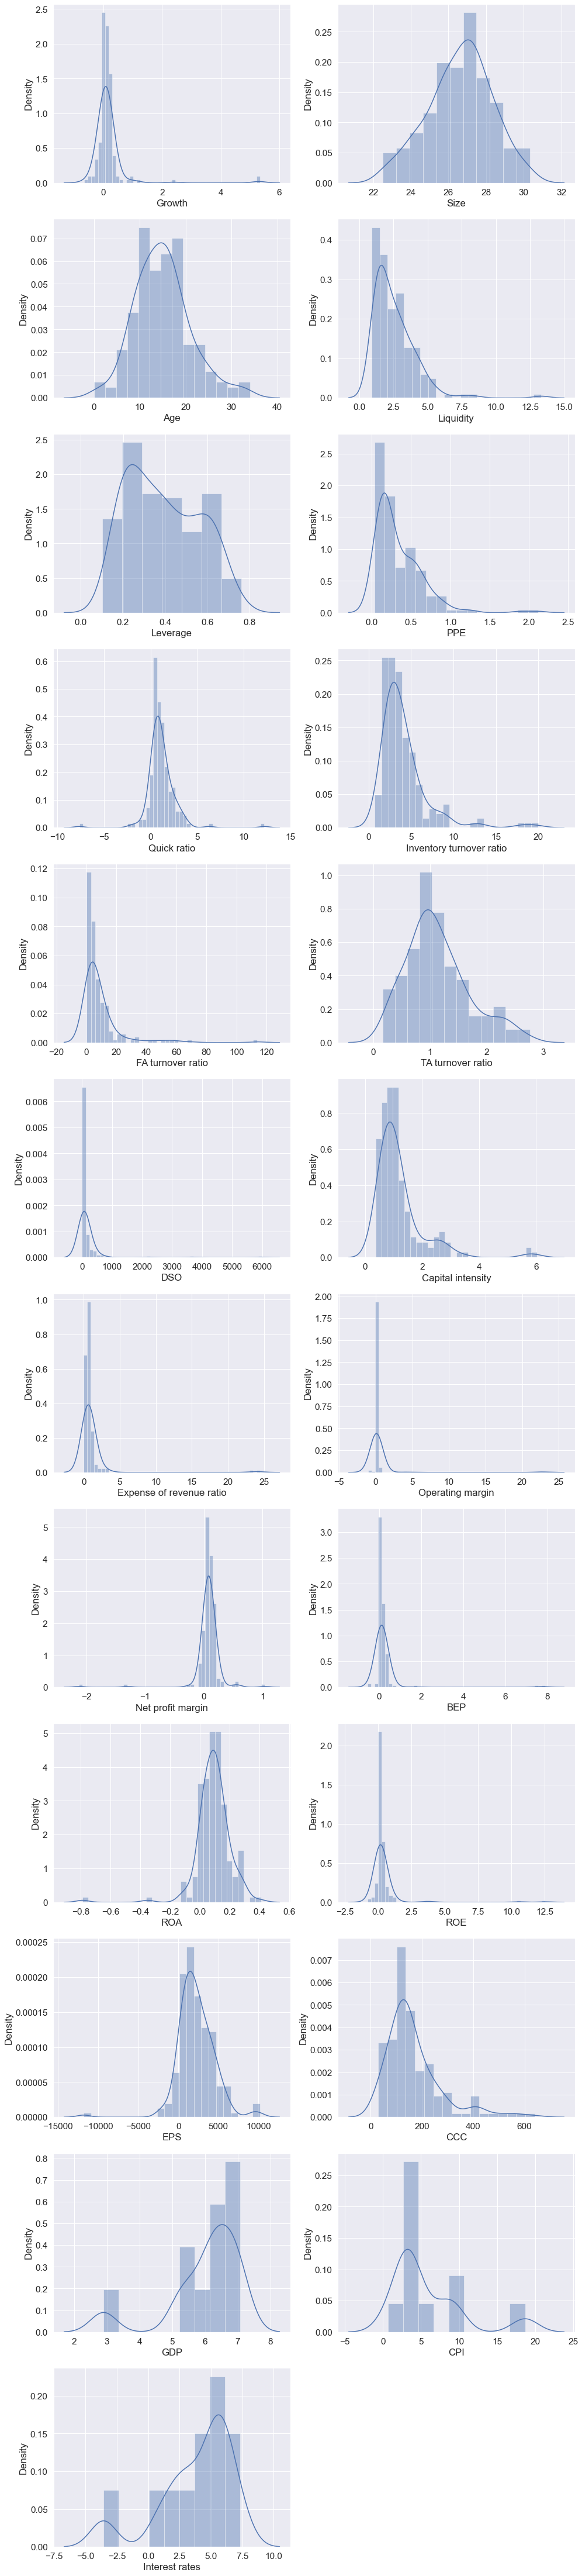

In [62]:
import seaborn as sns

plt.figure(figsize=(16,80))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(12,2,x)
    sns.distplot(data[i])
    x+=1
  plt.show()

density(['Growth', 'Size', 'Age', 'Liquidity', 'Leverage', 'PPE', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'TA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'Net profit margin', 'BEP', 'ROA', 'ROE', 'EPS', 'CCC', 'GDP', 'CPI', 'Interest rates'])

In [63]:
name = ['Growth', 'PPE', 'Liquidity', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'Net profit margin', 'ROE', 'CCC']
def capping(df):
  upper_limit = df[name].mean() + 3*df[name].std()
  lower_limit = df[name].mean() - 3*df[name].std()
  for i in name:
    df[name] = np.where(
      df[name]>upper_limit,
      upper_limit,
      np.where(
          df[name]<lower_limit,
          lower_limit,
          df[name]
      )
  )

capping(data)
data.describe()

,Size,Leverage,Growth,PPE,Liquidity,Age,Quick ratio,Inventory turnover ratio,FA turnover ratio,TA turnover ratio,...,Net profit margin,ROA,ROE,EPS,BEP,CCC,GDP,CPI,Interest rates,Target
count,169.000000,172.000000,170.000000,172.000000,172.000000,176.000000,172.000000,176.000000,172.000000,172.000000,...,169.000000,169.000000,169.000000,170.000000,172.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,26.619867,0.390524,0.122002,0.337047,2.517362,15.000000,1.116161,4.027559,8.514278,1.134400,...,0.087448,0.091985,0.309042,2209.828472,0.223229,164.346890,6.001623,5.821202,3.797918,0.727273
std,1.684440,0.169439,0.341027,0.268796,1.344606,6.089804,1.172888,2.417542,11.013788,0.558281,...,0.137792,0.116064,0.645941,2270.289552,0.837904,101.474840,1.134186,4.822571,2.952332,0.446632
min,22.502295,0.101511,-0.667648,0.037420,0.886635,0.000000,-3.449615,0.719574,0.032883,0.165447,...,-0.633479,-0.787392,-0.790580,-11820.461130,-0.552558,29.237244,2.905836,0.631201,-3.551709,0.000000
25%,25.617494,0.240297,-0.018484,0.131642,1.467765,11.000000,0.462382,2.449043,2.101456,0.794655,...,0.032467,0.038334,0.055606,821.804953,0.049417,102.742318,5.421883,2.795824,2.294892,0.000000
50%,26.808364,0.372681,0.074696,0.228347,2.165178,15.000000,0.919286,3.392990,4.605871,1.032837,...,0.082398,0.093350,0.189011,1927.298365,0.095866,135.992167,6.240303,3.539628,4.825874,1.000000
75%,27.712923,0.534891,0.194790,0.512594,3.174215,18.000000,1.584596,4.767077,10.255332,1.448520,...,0.132758,0.147191,0.342839,3447.257170,0.197766,204.623202,6.812246,9.094703,5.814896,1.000000
max,30.341455,0.761790,2.051533,1.268739,7.253523,34.000000,5.715702,12.795695,51.071111,2.766430,...,0.785711,0.411399,4.343117,10190.891660,7.906537,490.738874,7.075789,18.677732,7.322258,1.000000


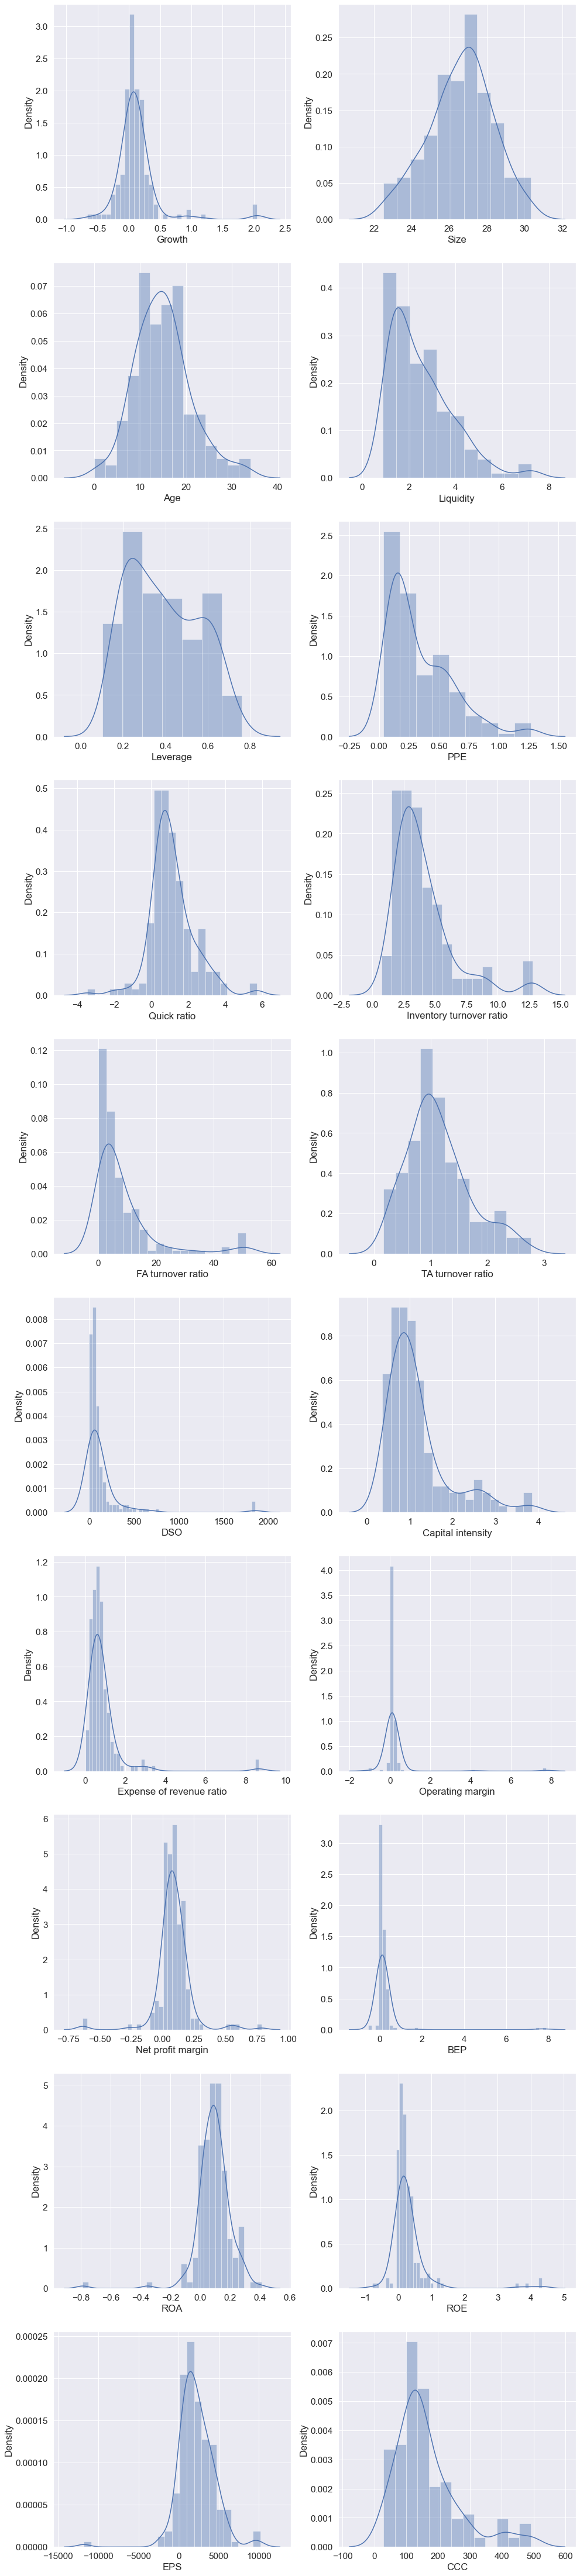

In [64]:
import seaborn as sns

plt.figure(figsize=(16,80))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(10,2,x)
    sns.distplot(data[i])
    x+=1
  plt.show()

density(['Growth', 'Size', 'Age', 'Liquidity', 'Leverage', 'PPE', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'TA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'Net profit margin', 'BEP', 'ROA', 'ROE', 'EPS', 'CCC'])

In [65]:
(data.isnull().sum()/176*100).sort_values(axis=0, ascending=False)

Size                        3.977273
ROE                         3.977273
ROA                         3.977273
Net profit margin           3.977273
Growth                      3.409091
EPS                         3.409091
Capital intensity           2.272727
BEP                         2.272727
Operating margin            2.272727
Leverage                    2.272727
Expense of revenue ratio    2.272727
DSO                         2.272727
TA turnover ratio           2.272727
FA turnover ratio           2.272727
Quick ratio                 2.272727
Liquidity                   2.272727
PPE                         2.272727
Inventory turnover ratio    0.000000
Age                         0.000000
CCC                         0.000000
GDP                         0.000000
CPI                         0.000000
Interest rates              0.000000
Target                      0.000000
dtype: float64

<AxesSubplot:>

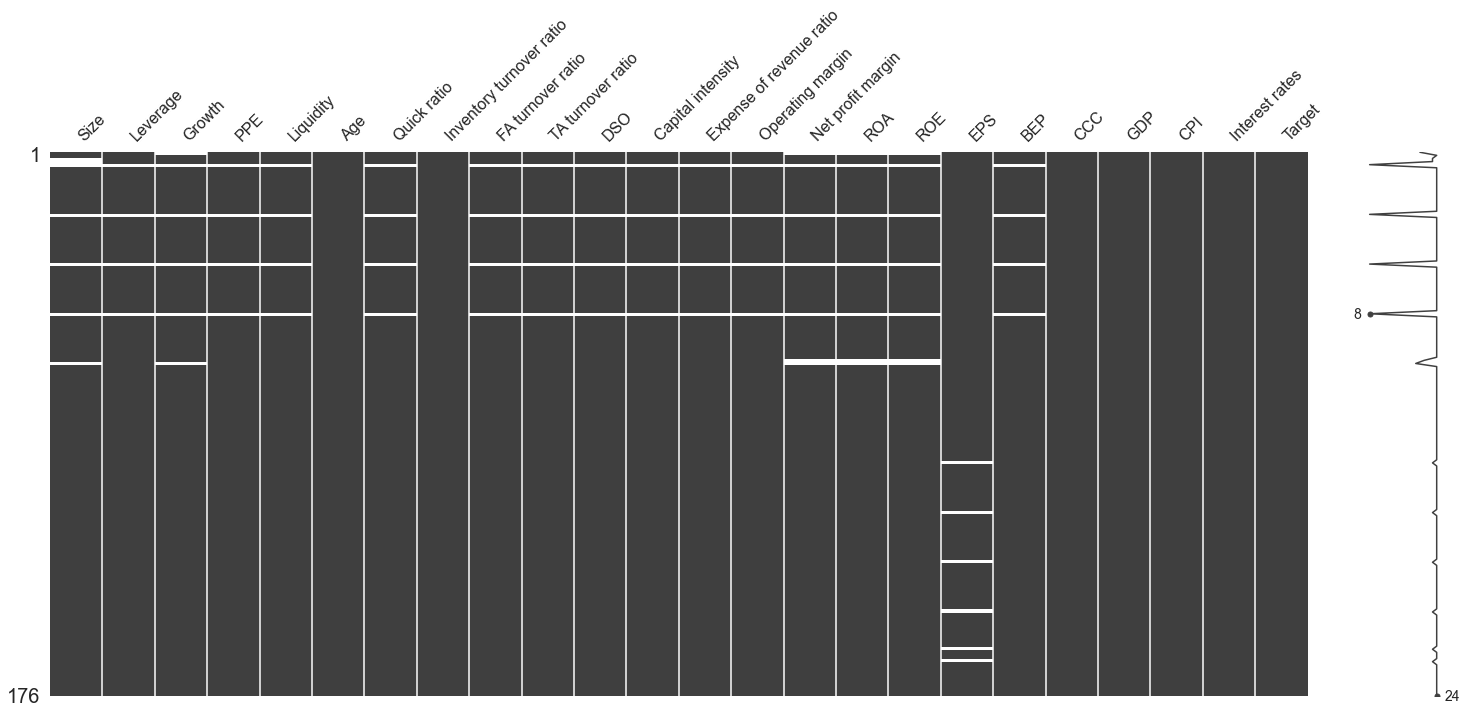

In [66]:
import missingno

missingno.matrix(data)

In [67]:
# Drop all columns that have at least 1 NaN
new_data = data.dropna(axis=0)
new_data = new_data.astype({'Age': int})
print(new_data.shape)

print(new_data.isnull().sum().sum())

(161, 24)
0


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [69]:
from sklearn import preprocessing

X = new_data.drop('Target', axis=1)
y = new_data.Target


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)

# Scale X
scaler = StandardScaler()
scaler.fit(X)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [71]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine (Linear Kernel)': LinearSVC(),
    'Support Vector Machine (RBF Kernel)': SVC(),
    'Neural Network': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
  model.fit(X_train, y_train)
  print(name + ' trained.')

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.


In [72]:
for name, model in models.items():
  result = model.score(X_test, y_test)
  print(name + ': {:.2f}%'.format(result * 100))

Logistic Regression: 84.85%
K-Nearest Neighbors: 81.82%
Decision Tree: 84.85%
Support Vector Machine (Linear Kernel): 87.88%
Support Vector Machine (RBF Kernel): 78.79%
Neural Network: 81.82%
Random Forest: 93.94%


In [73]:
y_test.value_counts() / len(y_test)

1.0    0.787879
0.0    0.212121
Name: Target, dtype: float64

In [74]:
y.value_counts() / len(y)

1.0    0.757764
0.0    0.242236
Name: Target, dtype: float64

In [75]:
from sklearn.ensemble import RandomForestClassifier

optimal n_estimators value is 45 that accuracy is 0.8882575757575758


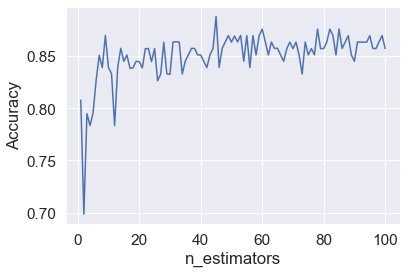

In [76]:
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1, 101))   # 100 trường hợp từ 1 đến 100 Decision Trees để tạo 100 Random Forest Metrics.
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
scores = gs.cv_results_['mean_test_score']

ind = np.where(scores == np.amax(scores))[0][0]+1

print(f'optimal n_estimators value is {ind} that accuracy is {scores.max()}')

import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

optimal n_estimators value is 45 that accuracy is 0.8882575757575758


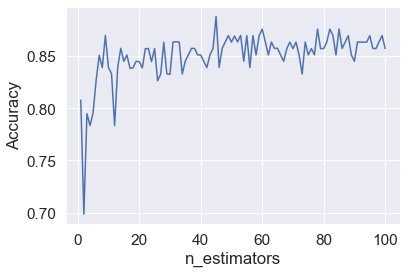

In [77]:
print(f'optimal n_estimators value is {ind} that accuracy is {max(scores)}')

import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [78]:
from sklearn.metrics import mean_squared_error, accuracy_score

rf = RandomForestClassifier(n_estimators=ind, random_state=0)

In [79]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = rf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

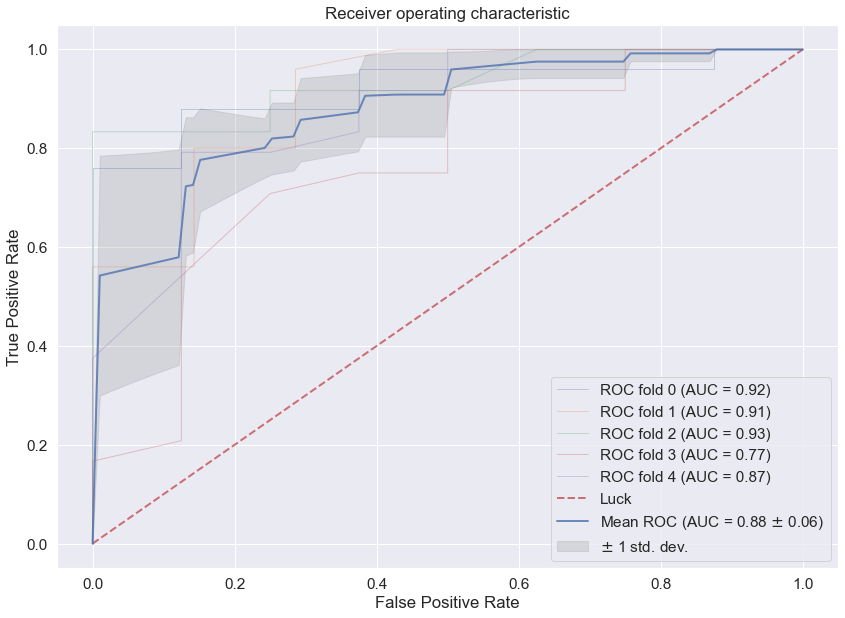

,AUC Train,AUC Test
0,1.0,0.920000
1,1.0,0.905714
2,1.0,0.932292
3,1.0,0.765625
4,1.0,0.872396


In [80]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    rf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [81]:
ft_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(ft_imp)

ROA                         0.158420
Net profit margin           0.119217
Capital intensity           0.071577
Leverage                    0.066615
ROE                         0.057809
TA turnover ratio           0.051005
FA turnover ratio           0.045692
PPE                         0.042588
Inventory turnover ratio    0.039351
DSO                         0.038836
Quick ratio                 0.036849
Size                        0.035129
Liquidity                   0.034000
Operating margin            0.032545
CCC                         0.031636
Interest rates              0.027737
Growth                      0.019579
Expense of revenue ratio    0.017732
Age                         0.016940
EPS                         0.015206
CPI                         0.015158
BEP                         0.015134
GDP                         0.011245
dtype: float64


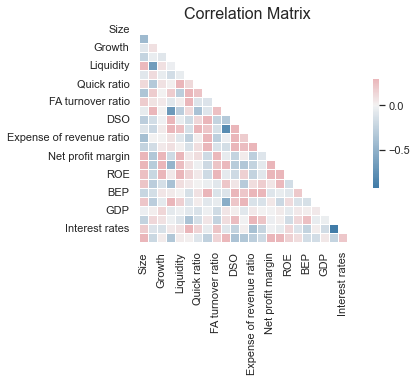

In [82]:
def plot_correlation_matrix(corr_mat):
 sns.set(style="white")
 mask = np.zeros_like(corr_mat, dtype=np.bool)
 mask[np.triu_indices_from(mask)] = True
 fig, ax = plt.subplots()
 cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
 sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
 square=True, linewidths=.5,
 cbar_kws={"shrink": .5}, ax=ax)
 ax.set_title('Correlation Matrix', fontsize=16)
 sns.set(style="darkgrid")
corr_mat = data.select_dtypes(include='number').corr()
plot_correlation_matrix(corr_mat)

y_pred = rf.predict(X_test)

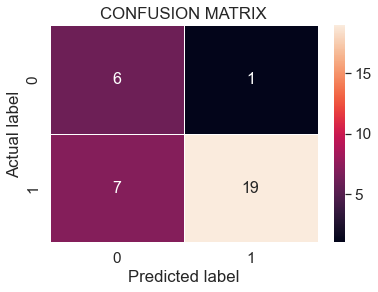

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

LABELS = [0, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, linewidths=.5, xticklabels=LABELS, yticklabels=LABELS) # font size
plt.title('CONFUSION MATRIX')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [84]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.46      0.86      0.60         7
         1.0       0.95      0.73      0.83        26

    accuracy                           0.76        33
   macro avg       0.71      0.79      0.71        33
weighted avg       0.85      0.76      0.78        33



In [85]:
y_pred

array([1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.])